In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [78]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('../Customized_Components')
from single_pad_transmon_pocket import TransmonPocket_Single
from rounded_single_pad import Round_TransmonPocket_Single as transmon
import Transmon_property as trans_p

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

In [14]:
data = pd.read_csv('CPW_QB_caps_only.csv')

In [15]:
data = data[['pad_size(mm)','coupling_len(um)','offset','C_CPW_Qb','C_CPW_Qbp','C_Qb_g']]

In [16]:
import seaborn as sns

In [8]:
sns.relplot(data = data, hue = 'coupling_len(um)', y = 'C_CPW_Qb', x = 'pad_size(mm)', size = 'offset')

In [12]:
phi0 = c.h/2/c.e.si
T = 30*u.mK
epsilon_r = 11.45
cc = 166930*u.fF/u.m

In [5]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '20 mm'
design.chips.main.size['size_y'] = '10 mm'

design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

design.variables['trace_width'] = '10 um'
cpw_pin_width = 10*u.um
design.variables['trace_gap'] = '7 um'
cpw_gap = 7*u.um

design.variables['pad_buffer_radius'] = '30 um'
design.variables['buffer_resolution'] = '10'
design.variables['connection_pad_buffer_radius'] = '2 um'

# design.chips['main']['material'] = 'Silicon'

gui = MetalGUI(design)

08:39AM 01s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 147 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



Component-specific variables

In [93]:


qb_options = dict(
pad_pocket_distance_top = '40um',
connection_pads = dict(
    a = dict(loc_W  = 0, 
            loc_H =  1, 
            pad_gap = '10um',
            pad_height = '20um',
            pad_width = '80um',
            pad_cpw_extent =  '2um',
            pocket_rise = '0um',
            pocket_extent = '1um',
            cpw_width='trace_width',
            cpw_gap='trace_gap',
            cpw_extend = '5um')))

TQ_options = dict(prime_width = design.variables['cpw_width'],
               prime_gap = design.variables['cpw_gap'],
               second_width = design.variables['trace_width'],
               second_gap = design.variables['trace_gap'],
               down_length = '60um',
               coupling_space = '5um',
               open_termination=False,
               hfss_wire_bonds = False,
               q3d_wire_bonds = False)

CPW_options = Dict(trace_width = design.variables['trace_width'],
               trace_gap  = design.variables['trace_gap'],
        total_length='5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='30 um',
        lead = dict(start_straight='20um', end_straight = '50um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end')), )

pin_inputs = Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end'))

trans_options = Dict(hfss_wire_bonds = True,
                     q3d_wirebonds = True,
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))


## Single Pad--Verify Design

### Draw the single pad transmon

In [51]:
design.delete_all_components()

In [94]:
design.overwrite_enabled = True

size = 0.25*u.mm
gap = 30*u.um
size = size.to(u.um)
pocket_width = size+2*gap


op = Dict(
    pos_x = '0',
    pad_height = '{}um'.format(size.value),
    pos_y = '0',
    pad_width = '{}'.format(size),
    pocket_width = '{}'.format(pocket_width), 
    **qb_options)

q1 = transmon(design,'Q1',options = op)

gui.rebuild()
gui.zoom_on_components(['Q1'])


09:27AM 19s WARNING [check_lengths]: For path table, component=cpw_1, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
09:27AM 19s WARNING [check_lengths]: For path table, component=cpw_1, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
  return lib.buffer(

  return lib.buffer(



In [92]:
TQ_options['down_length'] = '40 um'
TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='0 mm',
                                             pos_y='0.45 mm',
                                             mirror = True,
                                             coupling_length='120 um', **TQ_options))
TQ1.options['open_termination'] = True

gui.rebuild()
gui.autoscale()



  return lib.buffer(

  return lib.buffer(



In [45]:
data

,pad_size(mm),coupling_len(um),offset,C_CPW_Qb,C_CPW_Qbp,C_Qb_g
0,0.150000,40.0,0.200000,-7.23246,-50.94649,-58.11068
1,0.150000,40.0,0.283333,-7.16642,-51.01055,-58.11062
2,0.150000,40.0,0.366667,-7.08673,-51.09522,-58.11085
3,0.150000,40.0,0.450000,-7.01390,-51.16385,-58.09774
4,0.161429,40.0,0.200000,-7.58012,-55.85106,-63.33150
...,...,...,...,...,...,...
124,0.230000,62.5,0.200000,-11.40874,-85.90954,-97.00777
125,0.230000,62.5,0.283333,-11.30082,-86.01675,-97.00733
126,0.230000,62.5,0.366667,-11.15238,-86.01400,-97.00747
127,0.230000,62.5,0.450000,-11.03696,-86.27804,-97.00474


In [80]:
def anchor_CPW_round(qubit:designs.QDesign, buffer:float, wrap_gap:float, n:int, r = np.Inf, right = True, last_offset = 0):
    pocket_width = design.parse_value(qubit.options['pocket_width'])*u.mm
    cpad_height = design.parse_value(qubit.options['pad_height'])*u.mm
    distance_top = design.parse_value(qubit.options['pad_pocket_distance_top'])*u.mm
    jj_len = design.parse_value(qubit.options['jj_length'])*u.mm
    pocket_height = cpad_height + distance_top + jj_len
    
    wrap_r = max(pocket_width,pocket_height)+buffer
    
    x =design.parse_value(qubit.options['pos_x'])
    y =design.parse_value(qubit.options['pos_y'])
    
    
    anchors = pins_for_spiral_round(wrap_r.value, wrap_gap, n, dis = (x,y), right = right, r = r, last_offset = last_offset)
    return anchors
    

In [96]:
def pins_for_spiral_round(radius,gap,n,dis = (0,0), r = np.inf, right = True, last_offset = 0):
    spiral_list = trans_p.OrderedDict()
    x,y = dis
    i = 0
    if right:
        for step in range(n):
            point_value = radius / 2 + step * (0 + gap)
            spiral_list[step*4] = np.array([x+point_value, y+point_value])
            spiral_list[step*4+1] = np.array([x+point_value, y-point_value])
            spiral_list[step*4+2] = np.array([x-point_value, y-point_value])
            spiral_list[step*4+3] = np.array([x-point_value, y+point_value])

        # point_value = radius / 2 + (step + 1) * (0 + gap)
    else:
        for step in range(n):
            point_value = radius / 2 + step * (0 + gap)
            spiral_list[step*4] = np.array([x-point_value, y+point_value])
            spiral_list[step*4+1] = np.array([x-point_value, y-point_value])
            spiral_list[step*4+2] = np.array([x+point_value, y-point_value])
            spiral_list[step*4+3] = np.array([x+point_value + (0 + gap), y+point_value])

        # point_value = radius / 2 + (step + 1) * (0 + gap)
        # spiral_list[step*4+4] = np.array([point_value, point_value])
    
    final_list = trans_p.slice_dict(r,spiral_list)
    # i = len(final_list)
    # x = final_list[i-1][0]
    # y = final_list[i-1][1]
    # x -= last_offset
    # final_list[i-1] = (x,y)
    
    return(final_list)

In [56]:
anchor_CPW_round(q1, 0.15*u.mm, 0.055, 2, right = True, last_offset = 0)

OrderedDict([(0, array([0.24, 0.24])), (1, array([ 0.24, -0.24])), (2, array([-0.24,  0.24])), (3, array([-0.295,  0.24 ])), (4, array([0.295, 0.295])), (5, array([ 0.295, -0.295])), (6, array([-0.295,  0.295])), (7, array([-0.35 ,  0.295]))])


OrderedDict([(0, array([0.24, 0.24])),
             (1, array([ 0.24, -0.24])),
             (2, array([-0.24,  0.24])),
             (3, array([-0.295,  0.24 ])),
             (4, array([0.295, 0.295])),
             (5, array([ 0.295, -0.295])),
             (6, array([-0.295,  0.295])),
             (7, array([-0.35 ,  0.295]))])

In [58]:
design.delete_component('cpw_1')

False

In [30]:
def find_cpw_freq(pad_size, offset, extend, buffer = 150*u.um):
    gap1 = 0.055
    gap = 30*u.um
    size = pad_size.to(u.um)
    pocket_width = size+2*gap

    coupling_len = extend
    q1.options['pad_height'] = '{}'.format(size)
    q1.options['pad_width'] = '{}'.format(size)
    q1.options['pocket_width'] = '{}'.format(pocket_width)
    q1.options['connection_pads']['a']['pad_width'] = '{}'.format(coupling_len)
    # TQ1.options['open_termination'] = True
    gui.rebuild()

    anchors = anchor_CPW_round(q1,buffer, gap1, 2,last_offset = offset)
    design.delete_component('cpw_1')


    pin_inputs = Dict(
                start_pin=Dict(component='Q1', pin='a'),
                end_pin=Dict(component='TQ1', pin='second_end'))

    CPW_options['pin_inputs'] = pin_inputs

    qa = RouteMixed(design, 'cpw_1', options = Dict(anchors = anchors, **CPW_options))

    gui.rebuild()
    gui.autoscale()
    
    length = trans_p.find_total_len(qa, q1, TQ1, count_extend=True)
    return (trans_p.find_actual_frequency(length, cpw_pin_width, cpw_gap), length)

In [115]:
(length*cc).to(u.fF)

<Quantity 665.61047017 fF>

In [105]:
offsets

array([0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666667,
       0.45      , 0.2       , 0.28333333, 0.36666667, 0.45      ,
       0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666667,
       0.45      , 0.2       , 0.28333333, 0.36666667, 0.45      ,
       0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666667,
       0.45      , 0.2       , 0.28333333, 0.36666667, 0.45      ,
       0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666

In [106]:
extends

<Quantity [40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
           40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
           40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
           40. , 40. , 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5,
           47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5,
           47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5,
           47.5, 47.5, 47.5, 47.5, 55. , 55. , 55. , 55. , 55. , 55. ,
           55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. ,
           55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. ,
           55. , 55. , 55. , 55. , 55. , 55. , 62.5, 62.5, 62.5, 62.5,
           62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5,
           62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5,
           62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 70. ] um>

In [59]:
sizes

<Quantity [0.15      , 0.15      , 0.15      , 0.15      , 0.16142857,
           0.16142857, 0.16142857, 0.16142857, 0.17285714, 0.17285714,
           0.17285714, 0.17285714, 0.18428571, 0.18428571, 0.18428571,
           0.18428571, 0.19571429, 0.19571429, 0.19571429, 0.19571429,
           0.20714286, 0.20714286, 0.20714286, 0.20714286, 0.21857143,
           0.21857143, 0.21857143, 0.21857143, 0.23      , 0.23      ,
           0.23      , 0.23      , 0.15      , 0.15      , 0.15      ,
           0.15      , 0.16142857, 0.16142857, 0.16142857, 0.16142857,
           0.17285714, 0.17285714, 0.17285714, 0.17285714, 0.18428571,
           0.18428571, 0.18428571, 0.18428571, 0.19571429, 0.19571429,
           0.19571429, 0.19571429, 0.20714286, 0.20714286, 0.20714286,
           0.20714286, 0.21857143, 0.21857143, 0.21857143, 0.21857143,
           0.23      , 0.23      , 0.23      , 0.23      , 0.15      ,
           0.15      , 0.15      , 0.15      , 0.16142857, 0.16142857,
      

In [17]:
sizes = data['pad_size(mm)'].values*u.mm
offsets = data['offset'].values
extends = data['coupling_len(um)'].values*u.um
Cg = -data['C_Qb_g'].values*u.fF
C12 = -data['C_CPW_Qb'].values*u.fF

In [95]:
wc, length = find_cpw_freq(0.15*u.mm,0,50*u.um)

09:27AM 32s WARNING [check_lengths]: For path table, component=cpw_1, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
09:27AM 32s WARNING [check_lengths]: For path table, component=cpw_1, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(



In [72]:
gui.rebuild()
gui.autoscale()

  return lib.unary_union(collections, **kwargs)

  return lib.unary_union(collections, **kwargs)

  return lib.unary_union(collections, **kwargs)

  return lib.unary_union(collections, **kwargs)

09:12AM 56s WARNING [check_lengths]: For path table, component=cpw_1, key=trace has short segments that could cause issues with fillet. Values in (5-7) (11-14)  are index(es) in shapely geometry.
09:12AM 56s WARNING [check_lengths]: For path table, component=cpw_1, key=cut has short segments that could cause issues with fillet. Values in (5-7) (11-14)  are index(es) in shapely geometry.
  return lib.buffer(

  return lib.buffer(



In [79]:
wq = trans_p.freq_from_cap(Cg[0])[0]

In [116]:
Cr = length*cc

In [92]:
C_c = C12[0]
C_g = Cg[0]

In [117]:
g = 1/2*C_c/np.sqrt(C_g*Cr)*np.sqrt(wc*wq)*2*np.pi

In [118]:
(g**2/(wc-wq)).to(u.MHz)

<Quantity 254.59499642 MHz>

In [119]:
C_c/np.sqrt(C_g*Cr)

<Quantity 0.00116292 m(1/2) / mm(1/2)>

In [122]:
wc

<Quantity 7.64424276 GHz>

In [10]:
%matplotlib inline

In [8]:
data_f = pd.read_csv('CPW_QB_freq_only2.csv')

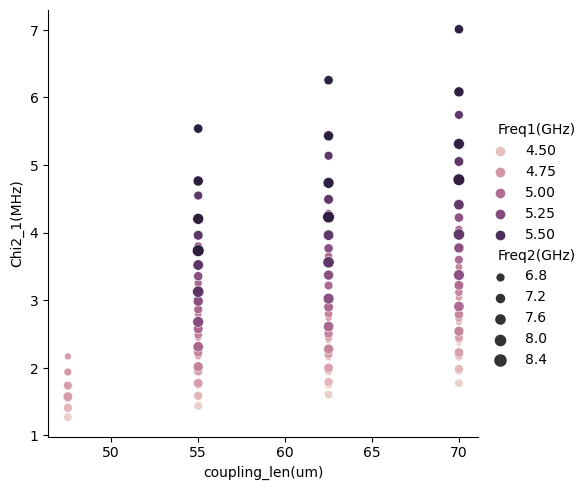

In [13]:
sns.relplot(data = data_f, x = 'coupling_len(um)', y = 'Chi2_1(MHz)', hue = 'Freq1(GHz)', size = 'Freq2(GHz)')

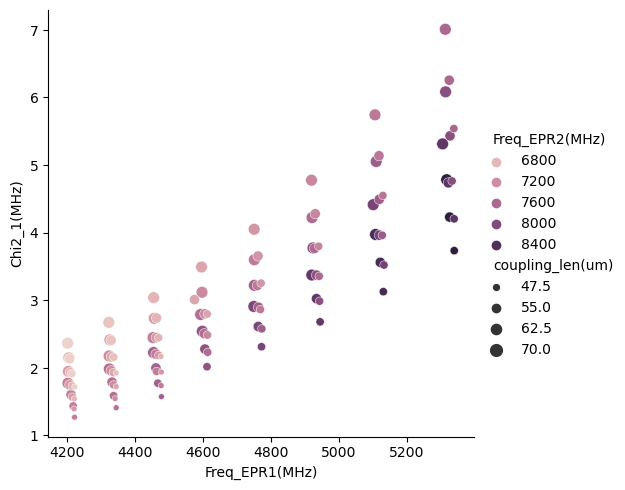

In [50]:
sns.relplot(data = data_f, size = 'coupling_len(um)', y = 'Chi2_1(MHz)', x = 'Freq_EPR1(MHz)', hue = 'Freq_EPR2(MHz)')

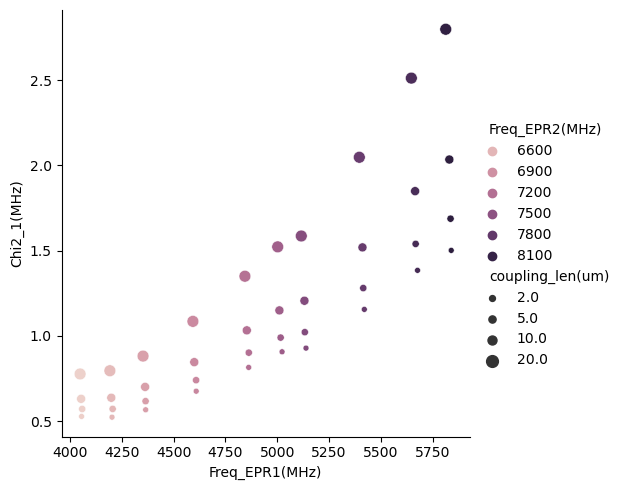

In [53]:
d = pd.read_csv('/Users/wendy/Desktop/Wendy-qiskit-code/data/CPW_QB_freq_only_0327_2.csv')
# d = d.sort_values(by=['coupling_len(um)'], ascending=False)
# d = d[d['Freq_EPR1(MHz)']>5200]
sns.relplot(data = d, size = 'coupling_len(um)', y = 'Chi2_1(MHz)', x = 'Freq_EPR1(MHz)', hue = 'Freq_EPR2(MHz)')

In [40]:
d

,Unnamed: 0,pad_size(mm),coupling_len(um),buffer(um),offset,target_freq(GHz),target_res_freq(GHz),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
11,11,0.196,10.0,206.0,0.4,4.6,7.0,4.905471,6.967269,4656.124803,263.082212,6966.795158,0.809706,0.000716
2,2,0.250,10.0,202.0,0.4,4.0,6.4,4.237308,6.357911,4052.963922,193.261113,6357.627434,0.508392,0.000370
20,20,0.155,10.0,203.0,0.4,5.2,7.6,5.648255,7.577294,5314.420134,354.494936,7576.416557,1.398597,0.001670
5,5,0.230,10.0,204.0,0.4,4.2,6.6,4.456127,6.577564,4251.629732,214.851910,6577.231703,0.587726,0.000450
17,17,0.170,10.0,202.0,0.4,5.0,7.4,5.340649,7.372224,5043.370739,314.861634,7371.552999,1.108253,0.001151
8,8,0.210,10.0,208.0,0.4,4.4,6.8,4.696001,6.765362,4468.123304,239.969355,6764.964387,0.690594,0.000565
14,14,0.184,10.0,206.0,0.4,4.8,7.2,5.094968,7.125183,4825.301599,285.007016,7124.630539,0.929497,0.000882
1,1,0.250,5.0,202.0,0.4,4.0,6.4,4.243383,6.365497,4058.492391,193.866612,6365.244350,0.452192,0.000292
19,19,0.155,5.0,203.0,0.4,5.2,7.6,5.653224,7.586105,5318.720166,355.275924,7585.369841,1.172379,0.001171
16,16,0.170,5.0,202.0,0.4,5.0,7.4,5.348289,7.382281,5050.094058,315.901768,7381.712090,0.940713,0.000826


In [12]:
dat = pd.read_csv('CPW_QB_freq_only2.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)


In [129]:
dat = pd.read_csv('CPW_QB_freq_only_0321.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
9,9,0.203333,20.0,4.789996,7.213821,4552.662081,249.968134,7213.144306,1.199628,0.001610
10,10,0.203333,20.0,4.790005,7.508614,4552.620482,250.055023,7508.020945,1.069961,0.001263
11,11,0.203333,20.0,4.789705,7.827313,4552.308936,250.096621,7826.790632,0.958747,0.001003
12,12,0.230000,20.0,4.448481,6.617974,4244.778667,213.825987,6617.375405,1.062931,0.001474
13,13,0.230000,20.0,4.446451,6.863778,4242.890084,213.705453,6863.254096,0.945022,0.001151
14,14,0.230000,20.0,4.446729,7.128647,4243.108376,213.798398,7128.184601,0.847721,0.000916
15,15,0.230000,20.0,4.446933,7.415848,4243.265469,213.871852,7415.433885,0.769088,0.000747


In [130]:
dat = pd.read_csv('CPW_QB_freq_only_0324.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
3,3,0.15,5.0,5.759035,8.8288,5411.217705,369.670014,8828.155214,1.133132,0.000985


In [132]:
dat = pd.read_csv('CPW_QB_freq_only_0324_2.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
1,1,0.176667,5.0,5.228354,7.631265,4943.841971,300.998901,7630.628643,1.097737,0.001145
2,2,0.176667,5.0,5.224563,7.958424,4940.418734,300.631012,7957.884713,0.952708,0.000849
3,3,0.176667,5.0,5.227801,8.317782,4943.260185,301.081265,8317.311737,0.849801,0.000665
4,4,0.203333,5.0,4.800327,6.964961,4561.914447,251.229025,6964.408273,0.959885,0.001042
